In [59]:
import requests
from bs4 import BeautifulSoup

import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [60]:
# Twitter scraping script credit: 
# https://medium.com/@dawran6/twitter-scraper-tutorial-with-python-requests-beautifulsoup-and-selenium-part-1-8e76d62ffd68

url = u'https://twitter.com/'
tweeter = u'realDonaldTrump'

In [3]:
req = requests.get(url+tweeter)
bsoup = BeautifulSoup(req.text, 'html.parser')

In [5]:
tweets = [p.text for p in bsoup.findAll('p', class_='tweet-text')]

In [15]:
print(len(tweets))

20


In [41]:
browser = webdriver.Chrome('/Users/henryharris/Desktop/chromedriver')
browser.get(url+tweeter)
time.sleep(1)

In [42]:
body = browser.find_element_by_tag_name('body')

for _ in range(1000):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.5)
    
tweets2 = browser.find_elements_by_class_name('tweet-text')

KeyboardInterrupt: 

In [38]:
len(tweets2)

821

Character by character instead of word by word
    - only have to predict onto 40ish characters instead of crazy big vocab
    
X is is previous 'seed' characters and y is the next character to generate

LSTM text generation - see keras link on Slack

"I did reverse the order of the input because it generates many short term dependencies between the “question” and the target “answer” which made bootstrapping the optimization problem easier."

In [3]:
import tweepy

auth = tweepy.OAuthHandler('OX6EZZ9kea7e3QgICtbN5fep0',
                           'F5IYMC7pEUo4ntf2mSU9vAuO4Z4tGa3pb2yKgnxR4cEZItJrWa')
auth.set_access_token('360249871-fMMBIO5myYfsFfDE35FYak1EU1p3rACWCBP0BZga',
                      'kqZz9dzHEPsMkEZWXCbWlucdW6bYAoP0nYTh6g5QI5vkC')

api = tweepy.API(auth)

In [5]:
#initialize a list to hold all the tweepy Tweets
alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline('realDonaldTrump',count=200)

#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

print("Most recently fetched tweet: ", alltweets[-1].text)

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before " + str(oldest))
    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline('realDonaldTrump',count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" + str(len(alltweets)))
    print("Most recently fetched tweet: ", alltweets[-1].text)

Most recently fetched tweet:  #WeeklyAddress🇺🇸
➡️https://t.co/uT4K4fh88Y https://t.co/1iW7tVVNCH
getting tweets before 863194069891031040
...%s tweets downloaded so far400
Most recently fetched tweet:  JOBS, JOBS, JOBS!
https://t.co/XGOQPHywrt https://t.co/B5Qbn6llzE
getting tweets before 849807049118625791
...%s tweets downloaded so far600
Most recently fetched tweet:  "One of the most effective press conferences I've ever seen!" says Rush Limbaugh. Many agree.Yet FAKE MEDIA  calls it differently! Dishonest
getting tweets before 832730328108134401
...%s tweets downloaded so far800
Most recently fetched tweet:  Will be interviewed by @ainsleyearhardt on @foxandfriends - Enjoy!
getting tweets before 821686928680583168
...%s tweets downloaded so far1000
Most recently fetched tweet:  I will be making my announcement on the next Secretary of State tomorrow morning.
getting tweets before 808469755749339135
...%s tweets downloaded so far1199
Most recently fetched tweet:  Thank you Wilmington

In [6]:
alltweets[6].text

'It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence.\n➡️… https://t.co/J1ulOd6pYQ'

In [7]:
alltweets[7].text

'While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!'

In [8]:
non_retweets = [t.text for t in alltweets if 'RT @' not in t.text]

In [9]:
len(non_retweets)

3018

In [10]:
non_retweets[:10]

["Democrats would do much better as a party if they got together with Republicans on Healthcare,Tax Cuts,Security. Obstruction doesn't work!",
 'Well, the Special Elections are over and those that want to MAKE AMERICA GREAT AGAIN are 5 and O! All the Fake News, all the money spent = 0',
 "Ralph Norman ran a fantastic race to win in the Great State of South Carolina's 5th District. We are all honored by your success tonight!",
 'Congratulations to Karen Handel on her big win in Georgia 6th. Fantastic job, we are all very proud of you!',
 'Thank you @FoxNews "Huge win for President Trump and GOP in Georgia Congressional Special Election."',
 'Things are looking great for Karen H!',
 'It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence.\n➡️… https://t.co/J1ulOd6pYQ',
 'While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!',
 'The U.S. once ag

In [11]:
len([t for t in non_retweets if '&amp;' in t])

278

In [127]:
trial = non_retweets[1]

In [128]:
trial

'The U.S. once again condemns the brutality of the North Korean regime as we mourn its latest victim. Video: https://t.co/Rvm11ZbPk7'

In [130]:
' '.join(word for word in trial.split() if word[0:4] != 'http')

'The U.S. once again condemns the brutality of the North Korean regime as we mourn its latest victim. Video:'

In [12]:
non_links = []
for tweet in non_retweets:
    new_tweet = ' '.join(word for word in tweet.split() if word[0:4] != 'http')
    non_links.append(new_tweet)

In [14]:
print(len(non_links))
print(len([t for t in non_links if 'http' in t]))
print(3011-24)

3018
24
2987


In [15]:
# remove extraneous links
for tweet in non_links:
    if 'http' in tweet:
        non_links.remove(tweet)

In [16]:
len(non_links)

2996

In [17]:
non_links[6]

'It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence. ➡️…'

In [18]:
import string

for c in list(non_links[6]):
    if c in string.punctuation: print(c)

@
@
.


In [19]:
for c in list(non_links[6]):
    if not c.isalpha() and c not in string.punctuation and c not in string.whitespace:
        non_links[6] = non_links[6].replace(c, '')
print(non_links[6])

It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence. 


In [20]:
# removes all emojis from tweets
# technically removes all characters that are not letter, numbers, punctuation, or whitespace
no_emojis = []
for tweet in non_links:
    for c in list(tweet):
        if not c.isalnum() and c not in string.punctuation and c not in string.whitespace:
            tweet = tweet.replace(c, '')
    no_emojis.append(tweet)

In [21]:
no_emojis[6]

'It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence. '

In [22]:
no_emojis[:20]

["Democrats would do much better as a party if they got together with Republicans on Healthcare,Tax Cuts,Security. Obstruction doesn't work!",
 'Well, the Special Elections are over and those that want to MAKE AMERICA GREAT AGAIN are 5 and O! All the Fake News, all the money spent = 0',
 "Ralph Norman ran a fantastic race to win in the Great State of South Carolina's 5th District. We are all honored by your success tonight!",
 'Congratulations to Karen Handel on her big win in Georgia 6th. Fantastic job, we are all very proud of you!',
 'Thank you @FoxNews "Huge win for President Trump and GOP in Georgia Congressional Special Election."',
 'Things are looking great for Karen H!',
 'It was a great honor to welcome President Petro Poroshenko of Ukraine to the @WhiteHouse today with @VP Pence. ',
 'While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!',
 'The U.S. once again condemns the brutality o

In [23]:
len([t for t in non_retweets if '&amp;' in t])

278

In [261]:
no_emojis[0]

'While I greatly appreciate the efforts of President Xi &amp; China to help with North Korea, it has not worked out. At least I know China tried!'

In [208]:
trial3 = no_emojis[0].replace('&amp;', '&')

In [210]:
trial3

'While I greatly appreciate the efforts of President Xi & China to help with North Korea, it has not worked out. At least I know China tried!'

In [24]:
# changes '&amp;' to simply '&'
# NEW - maybe replace with 'and' so it will learn how to spell 'and' rather have to learn where to place &
# idk bru
final_tweets = []
for tweet in no_emojis:
    if '&amp;' in tweet:
        tweet = tweet.replace('&amp;', '&')
    final_tweets.append(tweet)    

In [25]:
len(final_tweets)

2996

In [26]:
final_tweets[0]

"Democrats would do much better as a party if they got together with Republicans on Healthcare,Tax Cuts,Security. Obstruction doesn't work!"

In [27]:
print("Number of tweets: ", len(final_tweets))

Number of tweets:  2996


In [28]:
# all code below is based on Keras example documentation for LSTM Text Generation
chars = sorted(list(set(' '.join(final_tweets))))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 95


In [29]:
max_len = max(map(len, [tweet for tweet in final_tweets]))
print("Longest tweet in characters: ", max_len)

min_len = min(map(len, [tweet for tweet in final_tweets]))
print("Shortest tweet in characters: ", min_len)

Longest tweet in characters:  141
Shortest tweet in characters:  10


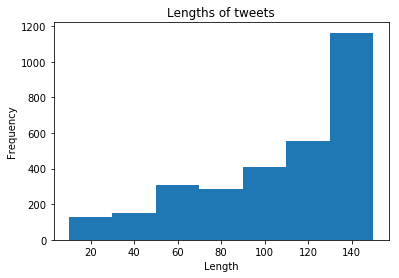

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

lengths = []
for tweet in final_tweets:
    lengths.append(len(tweet))

bin_width = 20
plt.hist(lengths, bins=range(min(lengths), max(lengths)+bin_width, bin_width))
plt.title("Lengths of tweets")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [31]:
# cut the text in semi-redundant sequences of maxlen characters
# idea for later cut text relative to size of tweet aka maxlen = len(tweet)/3
maxlen = 30
step = 3
sentences = []
next_chars = []
for tweet in final_tweets:
    if len(tweet) > 30:
        for i in range(0, len(tweet) - maxlen, step):
            sentences.append(tweet[i: i + maxlen])
            next_chars.append(tweet[i + maxlen])
    # two options here:
    # could iterate with a range like above, using lengths of 10 (min tweet length)
    # or could just get one sentence from each tweet based on length of each tweet
    else:
        sentences.append(tweet[len(tweet)-2])
        next_chars.append(tweet[len(tweet)-1])
print('nb sequences:', len(sentences))

nb sequences: 76684


In [32]:
import numpy as np

# might need to pad shorter sentences? jk apparently not
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop

# Building the model
print('Building model...')
model = Sequential()
model.add(LSTM(256, input_shape=(maxlen, len(chars)), return_sequences=True)) # might have problems if fed a shorter tweet than maxlen?
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01) # experiment by adding ReduceLROnPlateau
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Building model...


In [34]:
# essentially a softmax function with an option to change the degree of variability
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [42]:
print(y)

[[ True False False ..., False False False]
 [ True False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [48]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

model.fit(X, y, batch_size=128, epochs=55, callbacks=[reduce_lr])

Epoch 1/55
 6016/76684 [=>............................] - ETA: 587s - loss: 3.8716 

KeyboardInterrupt: 

In [35]:
import random
import sys

# train the model, output generated text after each iteration
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    start_index = random.randint(0, len(sentences)) # choose index to get random tweet beginning

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = sentences[start_index] # get the tweet using the random index
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(140-maxlen): # max length of a tweet is 140 characters
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
Iteration 1
Epoch 1/1
18176/76684 [======>.......................] - ETA: 98s - loss: 3.0397 

KeyboardInterrupt: 